# Research assistant
## This notebook explores the creation of a research assistant using llama index. The agent workflow follows:
1. Generate a plan of how to perform the research
1. Generate a list of questions per the outline
1. Collect data and answer the individual questions
1. Create a draft report
1. Critique and refine the draft

In [1]:
from tavily import TavilyClient
import nest_asyncio

nest_asyncio.apply()

In [8]:
# tavily_client = TavilyClient()
# results = tavily_client.search("What is the tavily api used for", max_results=2, include_raw_content=True)
# results

In [9]:
import os
from llama_index.tools.tavily_research.base import TavilyToolSpec
from dotenv import load_dotenv
load_dotenv()
tavily_tool = TavilyToolSpec(
    api_key=os.getenv("TAVILY_API_KEY"),
)

tavily_tool_list = tavily_tool.to_tool_list()
for tool in tavily_tool_list:
    print(tool.metadata.name)

search


In [36]:
results = tavily_tool.search(query="What is the tavily api used for", max_results=2)
results

[Document(id_='d5c5dbb7-179f-4fd9-9aca-055f5ded3340', embedding=None, metadata={'url': 'https://docs.tavily.com/docs/welcome'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, metadata_template='{key}: {value}', metadata_separator='\n', text_resource=MediaResource(embeddings=None, data=None, text="However, we've learned that none of today's search engines provide a suitable tool that provides factual, explicit and objective answers without the need to continuously click and explore multiple sites for a given research task.\n All in a single API call!\nTo learn how to build your AI application with Tavily Search API, check out the documentation page.\n Scraping doesn't scale and requires expertise to refine, current search engine APIs don't provide explicit information to queries but simply potential related articles (which are not always related), and are not very customziable for AI agent needs. GPT Researcher is an autonomous agent that takes care of

In [ ]:
from llama_index.core import Document, VectorStoreIndex

# documents = [Document(text=result["content"], metadata={"source":result["url"], "title":result["title"]}) for result in results["results"]]
# len(documents)

In [37]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
# from llama_index import Document
# from llama_index.llm_connectors import OllamaConnector
# from llama_index.embeddings import OllamaEmbeddings
# from llama_index.query_engine import QueryEngine

# Initialize Ollama connectors
# llm = OllamaConnector(model_name="llama3.2:1b") 
# embeddings = OllamaEmbeddings(model_name="all-minilm:latest")

# Sample documents
# documents = [
#     Document("This is the first document."),
#     Document("This is the second document."),
#     Document("This is the third document.")
# ]

from llama_index.core.node_parser import SentenceSplitter
splitter = SentenceSplitter(chunk_size=1024)
nodes = splitter.get_nodes_from_documents(results)

# Create a VectorStoreIndex
index = VectorStoreIndex.from_documents(
    results, 
    llm_predictor=Settings.llm, 
    embed_model=Settings.embed_model
)

from llama_index.core import VectorStoreIndex

vector_index = VectorStoreIndex(nodes)
query_engine = vector_index.as_query_engine(similarity_top_k=2)

# Query the index
query = "What are the documents about?"
response = query_engine.query(query)
print(response)

To power AI agents effectively, it's essential to have a reliable source of accurate and explicit search results. Tavily Search API is designed specifically for this purpose, offering a single API call that provides all the necessary data in one place.

By utilizing Tavily Search API, you can access a vast array of documents on a wide range of topics, allowing your AI agent to focus on the most relevant and important information. The goal is to provide everything needed for efficient research tasks, enabling users like you to concentrate on what truly matters – driving innovation and growth in your respective field.


In [29]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader, Settings
from llama_index.embeddings.ollama import OllamaEmbedding
from llama_index.llms.ollama import Ollama

def setup_models():
    """Setting up the embedding and language models..."""
    Settings.embed_model = OllamaEmbedding(model_name="all-minilm:latest", base_url="http://localhost:11434", ollama_additional_kwargs={"mirostat": 0}, request_timeout=3600.0)
    Settings.llm = Ollama(model="llama3.2:1b", request_timeout=60.0)

setup_models()

# pass_embedding = Settings.embed_model.get_text_embedding_batch(
#     ["This is a passage!", "This is another passage"], show_progress=True
# )
# print(pass_embedding)

# query_embedding = Settings.embed_model.get_query_embedding("Where is blue?")
# print(query_embedding)

# response = Settings.llm.complete("What is the capital of France?")
# print(response)

In [30]:
from llama_index.core.node_parser import SentenceSplitter
splitter = SentenceSplitter(chunk_size=1024)
nodes = splitter.get_nodes_from_documents(results)

In [31]:
print(nodes[0].get_content(metadata_mode="all"))

url: https://askai.glarity.app/search/What-is-Tavily-and-how-does-it-function-as-a-search-engine-for-AI-agents

What is Tavily and how does it function as a search engine for AI agents? What is Tavily and how does it function as a search engine for AI agents? Tavily is an innovative search engine specifically designed for AI agents, particularly those utilizing large language models (LLMs). This allows developers to leverage the full range of Tavily's search functionalities directly within their Python applications, making it easier to implement complex queries and retrieve results efficiently [4]. In summary, Tavily is a specialized search engine that enhances the capabilities of AI agents through its efficient search API, Python SDK, and automated research features. What is Tavily and how is it used by AI developers? What is the Tavily Search API, and what are its main features?


In [32]:
from llama_index.core import VectorStoreIndex

vector_index = VectorStoreIndex(nodes)#, embed_model='local')
query_engine = vector_index.as_query_engine(similarity_top_k=2)

In [33]:
query_engine.query("What is the tavily api used for")

Response(response="Tavily's Tavily Search API is designed specifically for AI agents, allowing developers to leverage its search functionalities directly within their Python applications. This enables them to implement complex queries efficiently and retrieve results in a more scalable manner.", source_nodes=[NodeWithScore(node=TextNode(id_='f1c1b020-d004-4d3e-b680-0019427dd7e2', embedding=None, metadata={'url': 'https://askai.glarity.app/search/What-is-Tavily-and-how-does-it-function-as-a-search-engine-for-AI-agents'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='d23c6055-8f08-4e25-8817-4c8e1b893ad2', node_type='4', metadata={'url': 'https://askai.glarity.app/search/What-is-Tavily-and-how-does-it-function-as-a-search-engine-for-AI-agents'}, hash='a97d5338666193fd180063565ef3b7a5bbc6d220cad2f1877aa3b79a0c1fbc99')}, metadata_template='{key}: {value}', metadata_separator='\n', text="What is Tavily 

In [ ]:
from llama_index.core.tools import FunctionTool
from typing import List


def vector_query(
    query: str, 
) -> str:
    """Perform a vector search over an index.
    
    query (str): the string query to be embedded.
    """

    query_engine = vector_index.as_query_engine(
        similarity_top_k=2,
    )
    response = query_engine.query(query)
    return response
    

vector_query_tool = FunctionTool.from_defaults(
    name="vector_tool",
    fn=vector_query
)

In [15]:
from llama_index.core import SummaryIndex
from llama_index.core.tools import QueryEngineTool

summary_index = SummaryIndex(nodes)
summary_query_engine = summary_index.as_query_engine(
    response_mode="tree_summarize",
    use_async=True,
)
summary_tool = QueryEngineTool.from_defaults(
    name="summary_tool",
    query_engine=summary_query_engine,
    description=(
        "Useful if you want to get a summary a document or documents."
    ),
)

In [20]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_query_tool, summary_tool], 
    llm=Settings.llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [23]:
response = agent.chat("What is tavily used for?")
print(response)

Added user message to memory: What is tavily used for?
=== Calling Function ===
Calling function: vector_tool with args: {"query": "what is tavily used for"}
=== Function Output ===
Tavily is used as a platform to power AI research assistants, allowing new creators building businesses to focus on their goals rather than spending time researching. It provides an automated research solution that can be integrated into various applications and projects to deliver accurate and factual results at speed.
=== LLM Response ===
{}

(name: "business_solution", value: "Tavily provides a scalable and reliable platform for AI research assistants, allowing businesses to focus on their core activities while leveraging Tavily's automated research capabilities.")
{}

(name: "business_solution", value: "Tavily provides a scalable and reliable platform for AI research assistants, allowing businesses to focus on their core activities while leveraging Tavily's automated research capabilities.")


In [1]:
# from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# model_id = "stabilityai/stable-diffusion-2"
from diffusers import AmusedPipeline

pipe = AmusedPipeline.from_pretrained(
    "amused/amused-512", variant="fp16", torch_dtype=torch.float16
)

# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")
negative_prompt = "low quality, ugly"
prompt = "a photo of an astronaut riding a horse on mars"
# image = pipe(prompt).images[0]
image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
image


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

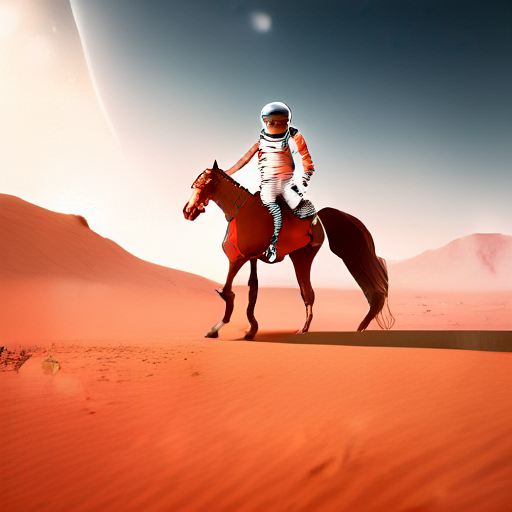

In [2]:
from llama_index.core.tools import FunctionTool
from typing import List

from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

# model_id = "stabilityai/stable-diffusion-2"
# scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
# pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")



def create_image(
    text: str, 
) -> str:
    """Create an image from text.
    
    text (str): the text to be used to create an image.
    """
    image = pipe(prompt, negative_prompt=negative_prompt, generator=torch.manual_seed(0)).images[0]
    return image
    

create_image_tool = FunctionTool.from_defaults(
    name="create_image",
    fn=create_image
)

create_image("a photo of an astronaut riding a horse on mars")

In [ ]:
from llama_index.core import VectorStoreIndex
from llama_index.core.objects import ObjectIndex

obj_index = ObjectIndex.from_objects(
    all_tools,
    index_cls=VectorStoreIndex,
)

In [ ]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    tool_retriever=obj_retriever,
    llm=llm, 
    system_prompt=""" \
You are an agent designed to answer queries over a set of given papers.
Please always use the tools provided to answer a question. Do not rely on prior knowledge.\

""",
    verbose=True
)
agent = AgentRunner(agent_worker)

In [3]:
from typing import List
from llama_index.core.workflow import (
    step,
    Event,
    Context,
    StartEvent,
    StopEvent,
    Workflow,
)
from llama_index.core.agent import FunctionCallingAgent

In [4]:
# 1. Generate a plan of how to perform the research
# 1. Generate a list of questions per the outline
# 1. Collect data and answer the individual questions
# 1. Create a draft report
# 1. Critique and refine the draft

# Maximum number of times the report can be iterated upon
MAX_NUM_REVIEWS = 3

class PlanEvent(Event):
    plan: str

class QuestionEvent(Event):
    question: str

class AnswerEvent(Event):
    question: str
    answer: str

class DraftEvent(Event):
    draft: str

class CritiqueEvent(Event):
    critique: str

class ProgressEvent(Event):
    progress: str

In [7]:
class DocumentResearchAgent(Workflow):
    @step()
    async def generate_plan(self, context: Context, event: StartEvent) -> PlanEvent:
        query = event.query
        await context.set("original_query", query)
        await context.set("tools", event.tools)

        prompt = f"""You are a senior software engineer who is good at analysis 
        and technical writing. You have been giving a task to provide a detailed 
        report which recommends the best tool to use for a specific task. Create 
        a plan for the final report; it should be detailed and specific. 
        Another agent will use the plan to generate a list of questions to 
        perform the research.
        The research topic is: {query}
        """

        response = await Settings.llm.complete(prompt)

        context.write_event_to_stream(
            ProgressEvent(progress="Plan generated:\n" + str(response))
            )

        return PlanEvent(plan=str(response))
    
    @step()
    async def generate_questions(self, context: Context, event: PlanEvent) -> QuestionEvent:
        plan = event.plan
        await context.set("plan", plan)

        prompt = f"""Generate a list of questions that can be used to perform 
        research on the following plan. Formulate a series of simple questions 
        that will get you the facts necessary to fulfill the plan. You 
        cannot assume any existing knowledge; you must ask at least one
        question for every bullet point in the plan. Avoid complex or 
        multi-part questions; break them down into a series of simple questions. 
        Your output should be a list of questions, each on a new line. Do not 
        include headers or categories or any preamble or explanation; just a
        list of questions. Limit the number of questions to 10 questions. 
        The research plan is: {plan}
        """
        response = await Settings.llm.complete(prompt)

        questions = str(response).split("\n")
        questions = [q for q in questions if q]

        context.write_event_to_stream(
            ProgressEvent(progress="Questions generated:\n" + str(response))
            )
        
        await context.set("num_questions", len(questions))

        for q in questions:
            context.send_event(QuestionEvent(question=q))

    @step()
    async def answer_question(self, context: Context, event: QuestionEvent) -> AnswerEvent:
        question = event.question

        agent = FunctionCallingAgent.from_tools(await context.get("tools"), verbose=True)
        response = await agent.aquery(question)

        context.write_event_to_stream(
            ProgressEvent(progress=f"Question: {question}\nAnswer: {response}")
            )
        
        return AnswerEvent(question=question, answer=str(response))
    
    @step()
    async def create_draft(self, context: Context, event: AnswerEvent) -> DraftEvent:
        # Wait until we receive all of the answers
        num_questions = await context.get("num_questions")
        results = context.collect_events(event, [AnswerEvent] * num_questions)

        # Maintain a list of old questions and answers
        previous_questions = await context.get("previous_questions", [])
        previous_questions.extend(results)
        await context.set("previous_questions", previous_questions)

        prompt = f"""You are an expert at writing detailed analysis reports. 
        You are given a plan for the report and a series of questions and 
        answers that should provide all the data you need to write the blog 
        post. Compose the report according to the plan, using only the 
        data given in the answers. The plan is in <plan> and the 
        questions and answers are in <questions> and <answers>.
        <plan>{await context.get('plan')}</plan>"""

        for r in previous_questions:
            prompt += f"<question>{r.question}</question><answer>{r.answer}</answer>\n"

        context.write_event_to_stream(
            ProgressEvent(progress="Drafting report with prompt:\n" + prompt)
            )
        
        draft = await Settings.llm.acomplete(prompt)

        return DraftEvent(draft=str(draft))
    
    @step()
    async def critique_draft(self, context: Context, event: DraftEvent) -> StopEvent | QuestionEvent:
        num_reviews = await context.get("num_reviews", 0)
        num_reviews += 1
        await context.set("num_reviews", num_reviews)

        draft = event.draft

        prompt = f"""You are a senior software developer good at reviewing 
        analysis reports. You are given an original query, and a report 
        that was written to satisfy that query. Review the report and determine
        if it adequately answers the query and contains enough detail. If it 
        doesn't, come up with a set of questions that will get you the facts 
        necessary to add to the report. Another agent will answer those 
        questions. Your response should just be a list of questions, one
        per line, without any preamble or explanation. For speed, generate a 
        maximum of 4 questions. 
        The original query is: '{await context.get('original_query')}'.
        The report is: <draft>{draft}</draft>.
        If the report is fine, return just the string 'OKAY'."""

        response = await Settings.llm.acomplete(prompt)

        if response == "OKAY" or await context.get("num_reviews") >= MAX_NUM_REVIEWS:
            context.write_event_to_stream(
                ProgressEvent(progress="Report finalized")
            )
            return StopEvent(result=draft)
        else:
            questions = str(response).split("\n")
            await context.set("num_questions", len(questions))
            context.write_event_to_stream(
                ProgressEvent(progress="Generated additional questions")
            )
            for q in questions:
                context.send_event(QuestionEvent(question=q))

In [38]:
agent = DocumentResearchAgent(timeout=600, verbose=True)

handler = agent.run("What is the tavily api used for?", tools=[tavily_tool])

AttributeError: 'str' object has no attribute '_tasks'